In [1]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# np.random.choice?
# np.average?

In [3]:
X = []
data_file = open('../data/k-means/testSet.txt', 'r')
for line in data_file.readlines():
    line = line.strip()
    x1, x2 = line.split('\t')
#     print('x1:', x1)
#     print('x2:', x2)
    X.append([x1, x2])
#     print('line:', line)
data_file.close()
# print(X)
X = np.array(X, dtype='float32')

In [4]:
X_len = X.shape[0]
y_pred = np.zeros(X_len, dtype='int')
k = 4
rand_center_indices = np.random.choice(X_len, k)
rand_center = X[rand_center_indices]

In [5]:
rand_center.shape

(4, 2)

In [6]:
def dist(x1, x2):
    return np.sqrt(np.sum(np.power((x1-x2), 2)))

In [7]:
dist(X[0, :], X[1, :])

5.1846328

In [8]:
iterate_count = 100
while iterate_count:
    # 计算各个点到中心距离的距离并分类
    for data_id, x in enumerate(X):
        dist_x = []
        for center_k in range(k):
            dist_k = dist(x, rand_center[center_k])
            dist_x.append(dist_k)
        dist_x = np.array(dist_x)
#         print('dist_x.shape:', dist_x.shape)
        min_dist_index = np.argmin(dist_x)
#         print('min_dist_index:', min_dist_index)
        y_pred[data_id] = min_dist_index

    # 重新计算聚类中心
    for center_k in range(k):
        data_ids = (y_pred==center_k)
        x_center_k = X[data_ids]
#         print('data_ids:', data_ids)
#         print('x_center_k:', x_center_k)
#         print('x_center_k.shape:', x_center_k.shape)
        rand_center[center_k] = np.average(x_center_k, axis=0)
#         dist_x.append(dist_k)
#     print('rand_center:', rand_center)
    iterate_count -= 1

In [9]:
color_dict = np.array(['r', 'g', 'b', 'y'])
color_center_dict = np.array(['g', 'b', 'y', 'k'])
y_pred_color = color_dict[y_pred]

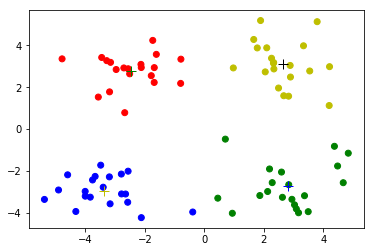

In [10]:
plt.scatter(X[:, 0], X[:, 1], color=y_pred_color)
for cluster_center_index, cluster_center in enumerate(rand_center):
    plt.plot(cluster_center[0], cluster_center[1], marker='+', markersize=10, color=color_center_dict[cluster_center_index])